1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to create a strong learner. It builds models sequentially, where each model corrects the errors made by the previous ones.

2. How does Boosting differ from Bagging?
| Feature            | **Bagging**                                          | **Boosting**                           |
| ------------------ | ---------------------------------------------------- | -------------------------------------- |
| Model Training     | Parallel                                             | Sequential                             |
| Objective          | Reduce variance                                      | Reduce bias (and variance)             |
| Data Sampling      | Random subsets with replacement                      | Weighted or focused on previous errors |
| Model Combination  | Average (regression), majority vote (classification) | Weighted sum                           |
| Example Algorithms | Random Forest                                        |
AdaBoost, Gradient Boosting, XGBoost   |

3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) focuses on improving misclassified instances:

Assigns higher weights to misclassified points.

Next learners focus more on those difficult examples.

Combines all weak learners using weighted majority voting.

4. Explain the working of AdaBoost with an example
Example (Binary Classification):

Start with equal weights for all training data.

Train a weak learner (e.g., a shallow decision tree).

Calculate error rate: higher if more samples are misclassified.

Update weights:

Increase for misclassified examples.

Decrease for correctly classified ones.

Repeat steps 2–4 for several iterations.

Final prediction = weighted sum of all weak learners.

5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting is a more generalized boosting method:

It minimizes a loss function using gradient descent.

Each new tree is trained on the residuals (errors) of the previous model.

Difference from AdaBoost:

AdaBoost uses weighted errors.

Gradient Boosting uses gradients of a loss function (like MSE or log-loss).

6. What is the loss function in Gradient Boosting?
Depends on the task:

Regression: Mean Squared Error (MSE)

Classification: Log Loss / Cross Entropy

Can be custom-defined as long as it's differentiable.

7. How does XGBoost improve over traditional Gradient Boosting?
XGBoost (Extreme Gradient Boosting) improvements:

Regularization (L1 and L2) to prevent overfitting.

Parallelized tree construction.

Tree pruning using max depth and gain.

Handling missing values automatically.

Efficient memory and CPU usage.

8. What is the difference between XGBoost and CatBoost?
| Feature          | **XGBoost**                            | **CatBoost**                                 |
| ---------------- | -------------------------------------- | -------------------------------------------- |
| Categorical Data | Must be preprocessed (e.g., one-hot)   | Automatically handles categorical features   |
| Training Speed   | Very fast with tuned settings          | Slower but often requires less tuning        |
| Overfitting      | Regularized, but sensitive to settings | Reduced overfitting with built-in strategies |
| Ease of Use      | Requires preprocessing                 | More plug-and-play                           |
10. What are some real-world applications of Boosting techniques?
Finance: Credit scoring, fraud detection

Healthcare: Disease prediction, readmission prediction

Marketing: Customer churn, segmentation

E-commerce: Product recommendation

Text mining: Sentiment analysis, spam detection

Computer vision: Image classification (e.g., with gradient boosting trees on extracted features)

11. How does regularization help in XGBoost?
Regularization (L1 and L2) helps by:

Penalizing complex trees.

Reducing the chance of overfitting.

Ensuring simpler, more generalizable models.

12. What are some hyperparameters to tune in Gradient Boosting models?
Common hyperparameters include:

n_estimators: Number of trees

learning_rate: Step size shrinkage

max_depth: Tree depth

subsample: Row sampling ratio

colsample_bytree: Feature sampling ratio

min_child_weight: Minimum samples per leaf

gamma (XGBoost): Minimum loss reduction to make a split

lambda, alpha: L2 and L1 regularization terms

13. What is the concept of Feature Importance in Boosting?
Feature Importance tells you how much each feature contributes to the model. In boosting:

Calculated by gain, frequency, or coverage.

Helps in feature selection and model interpretation.

14. Why is CatBoost efficient for categorical data?
CatBoost is efficient because:

It handles categorical variables natively without needing encoding.

Uses ordered boosting to reduce prediction shift.

Converts categories to numbers based on target statistics with random permutations, avoiding overfitting.

In [ ]:
                                       # practical question


In [4]:
#1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.915


In [5]:
#2
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 57.42631599397928


In [6]:
#3
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
model = GradientBoostingClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=data.feature_names)
print(importances.sort_values(ascending=False))


worst radius               0.440791
worst perimeter            0.151093
mean concave points        0.125825
worst concave points       0.125096
worst texture              0.037099
worst area                 0.030213
mean texture               0.025881
worst concavity            0.012600
area error                 0.009205
compactness error          0.008855
worst smoothness           0.007131
concave points error       0.004372
texture error              0.003834
radius error               0.002504
concavity error            0.002370
mean compactness           0.002180
perimeter error            0.001815
worst symmetry             0.001700
fractal dimension error    0.001323
worst fractal dimension    0.001079
mean perimeter             0.000907
symmetry error             0.000728
mean symmetry              0.000701
worst compactness          0.000691
mean area                  0.000645
mean concavity             0.000492
smoothness error           0.000486
mean fractal dimension     0

In [7]:
#4
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test)))


R² Score: 0.9255528533179773


In [9]:
#5
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification # Use make_classification for classification data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate classification data
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gb_model = GradientBoostingClassifier().fit(X_train, y_train)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_model.predict(X_test)))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_model.predict(X_test)))

Gradient Boosting Accuracy: 0.98
XGBoost Accuracy: 0.975


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:18:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
#6
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
print("F1-Score:", f1_score(y_test, model.predict(X_test)))


ModuleNotFoundError: No module named 'catboost'

In [15]:
%pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
print("F1-Score:", f1_score(y_test, model.predict(X_test)))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.0 MB/s eta 0:00:00
F1-Score: 0.9775280898876404


In [16]:
#7
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)))


MSE: 0.025886908173561096


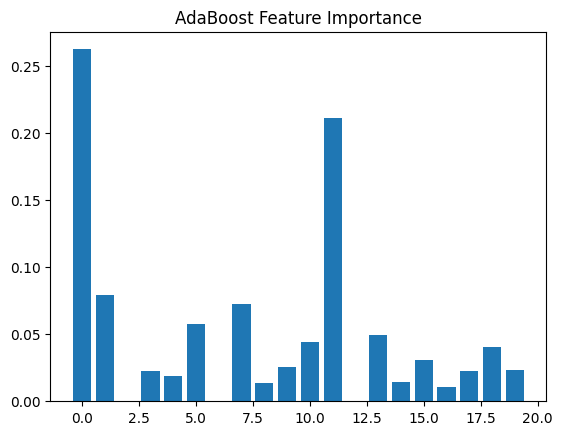

In [17]:
#8
import matplotlib.pyplot as plt

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("AdaBoost Feature Importance")
plt.show()


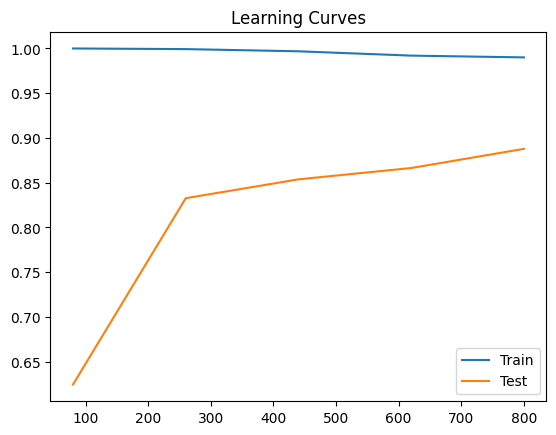

In [18]:
#9
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(), X, y, cv=5, scoring='r2'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
plt.legend()
plt.title("Learning Curves")
plt.show()


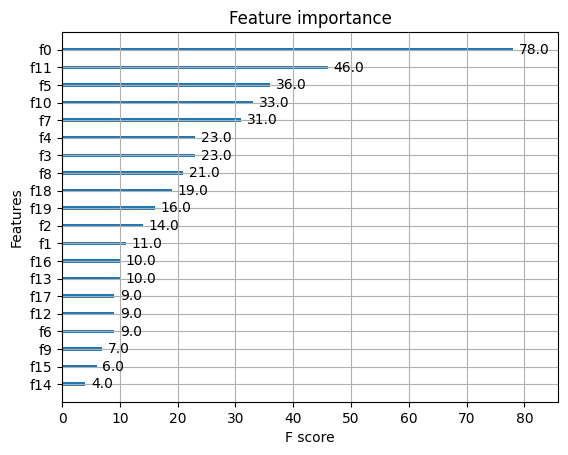

In [19]:
#10
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model)
plt.show()


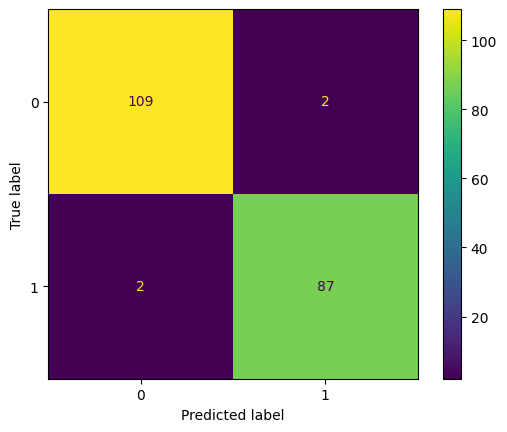

In [20]:
#11
from sklearn.metrics import ConfusionMatrixDisplay

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [21]:
#12
for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    print(f"Accuracy ({n} estimators):", accuracy_score(y_test, model.predict(X_test)))


Accuracy (10 estimators): 0.96
Accuracy (50 estimators): 0.965
Accuracy (100 estimators): 0.97
Accuracy (200 estimators): 0.98


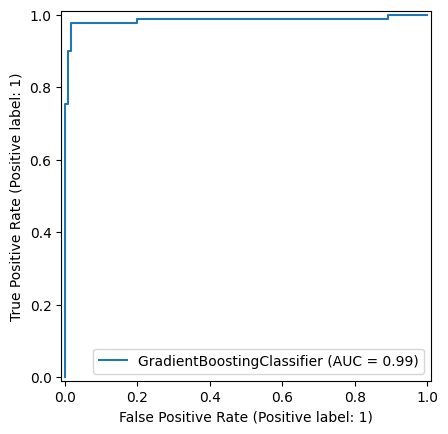

In [22]:
#13
from sklearn.metrics import RocCurveDisplay

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [23]:
#14
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, y_train)
print("Best learning rate:", grid.best_params_['learning_rate'])


Best learning rate: 0.1


In [24]:
#15
model = CatBoostClassifier(class_weights=[1, 5], verbose=0)
model.fit(X_train, y_train)
print("F1-Score (weighted):", f1_score(y_test, model.predict(X_test)))


F1-Score (weighted): 0.9560439560439561


In [25]:
#16
for lr in [0.01, 0.1, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    print(f"Learning Rate {lr} Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Learning Rate 0.01 Accuracy: 0.96
Learning Rate 0.1 Accuracy: 0.965
Learning Rate 1.0 Accuracy: 0.965


In [26]:
#17
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = XGBClassifier(objective='multi:softprob', num_class=10)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

print("Log-Loss:", log_loss(y_test, y_pred_proba))


Log-Loss: 0.19172090863641145


In [ ]:
#18
